# Tratamento de dados

### passo 1 - importar bibliotecas 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import signal, ndimage

### passo 2 - importar csv de referência
    - imprtar utilizando pandas
    - imprimir gráficos de cada canal

In [2]:
datasheet = pd.read_csv("../datasheets/original.csv", delimiter=";")

colors = {"hand_open":"orange", "hand_flex_curl":"blue"}

# laco para gerar os gráficos baseados na label (hand-open ou hand-flex-curl)

for i in range(0,4):
    plt.figure(figsize=(20,6))
    plt.scatter(range(len(datasheet[f"ch{i}"])), datasheet[f"ch{i}"], color=datasheet["gesture"].map(colors), s=1)
    plt.title("Original signal colored by gesture")
    plt.suptitle(f"Channel {i}")
    plt.savefig(f"../graphs/original/original-labeled-ch{i}.png")
    plt.clf()

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

### passo 4 - Aplicar filtro da mediana
    - reduzir o ruído de impulso
    - salvar em novo csv
    - gerar gráficos para cada canal

In [4]:
# copiando datasheet
median = datasheet.copy()

# laco para aplicar o filtro da mediana nos 4 canais
for i in range(0,4):
    # aplica o filtro da mediana no canal i
    median[f"ch{i}"] = signal.medfilt(median[f"ch{i}"], 9)
    # gera gráficos para o canal i
    plt.figure(figsize=(20,6))
    plt.scatter(range(len(median[f"ch{i}"])), median[f"ch{i}"], color=median["gesture"].map(colors), s=1)
    plt.title("Filtered by median signal colored by gesture")
    plt.suptitle(f"Channel {i}")
    plt.savefig(f"../graphs/median/median-labeled-ch{i}.png")
    plt.clf()
    
# salvando dados em um novo arquivo .csv
median.to_csv("../datasheets/median.csv")

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

### passo 5 - Aplicar média móvel
    - suavizar sinal
    - salvar em um novo csv
    - gerar gráficos para cada canal

In [5]:
# copiando datasheet
mov_avg = median.copy()

# laco para aplicar o filtro da mediana nos 4 canais
for i in range(0,4):
    # aplica o media movel no canal i
    mov_avg['ch0'] = median.ch0.rolling(100).mean()
    mov_avg['ch1'] = median.ch1.rolling(100).mean()
    mov_avg['ch2'] = median.ch2.rolling(100).mean()
    mov_avg['ch3'] = median.ch3.rolling(100).mean()
    
    # gera gráficos para o canal i
    plt.figure(figsize=(20,6))
    plt.scatter(range(len(mov_avg[f"ch{i}"])), mov_avg[f"ch{i}"], color=mov_avg["gesture"].map(colors), s=1)
    plt.title("rolling mean applied to the signal colored by gesture")
    plt.suptitle(f"Channel {i}")
    plt.savefig(f"../graphs/mov_avg/mov_avg-labeled-ch{i}.png")
    plt.clf()
    
# salvando dados em um novo arquivo .csv
mov_avg.to_csv("../datasheets/mov_avg.csv")

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

### passo 6 - encontrar o zero do sinal
    - tecnica utilizada: subtrair o valor de um intervalo por sua media móvel
    - salvar em um novo csv
    - gerar graficos para cada canal

In [6]:
# copiando datasheet
centered = mov_avg.copy()

# laco para aplicar o filtro da mediana nos 4 canais
for i in range(0,4):
    # aplica a poeracao de centralização no canal i
    for j in range (0, len(centered[f"ch{i}"]), 100):
        centered[f"ch{i}"][j:j+100] = centered[f"ch{i}"][j:j+100] - centered[f"ch{i}"][j:j+100].mean()
    # gera gráficos para o canal i
    plt.figure(figsize=(20,6))
    plt.scatter(range(len(centered[f"ch{i}"])), centered[f"ch{i}"], color=centered["gesture"].map(colors), s=1)
    plt.plot(range(len(centered[f"ch{i}"])), np.zeros_like(centered[f"ch{i}"]), color="black")
    plt.title("signal centered on zero colored by gesture")
    plt.suptitle(f"Channel {i}")
    plt.savefig(f"../graphs/centered/centered-labeled-ch{i}.png")
    plt.clf()
    
# salvando dados em um novo arquivo .csv
centered.to_csv("../datasheets/centered.csv")

/tmp/ipykernel_18775/4257141880.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  centered[f"ch{i}"][j:j+100] = centered[f"ch{i}"][j:j+100] - centered[f"ch{i}"][j:j+100].mean()
/tmp/ipykernel_18775/4257141880.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  centered[f"ch{i}"][j:j+100] = centered[f"ch{i}"][j:j+100] - centered[f"ch{i}"][j:j+100].mean()
/tmp/ipykernel_18775/4257141880.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

In [3]:
centered = pd.read_csv('../datasheets/centered.csv')
maximum = centered.copy()

for i in range(0,4):
    maximum['ch0'] = centered.ch0.rolling(9).max()
    maximum['ch1'] = centered.ch1.rolling(9).max()
    maximum['ch2'] = centered.ch2.rolling(9).max()
    maximum['ch3'] = centered.ch3.rolling(9).max()

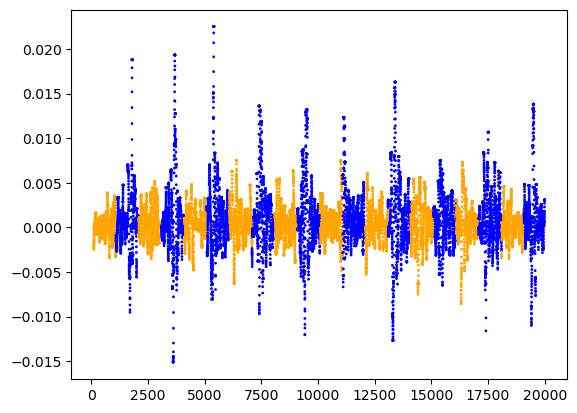

In [7]:
colors = {"hand_open":"orange", "hand_flex_curl":"blue"}
plt.scatter(range(len(maximum["ch0"][0:20000])), maximum["ch0"][:20000], color=maximum["gesture"][:20000].map(colors), s=1)
plt.show()

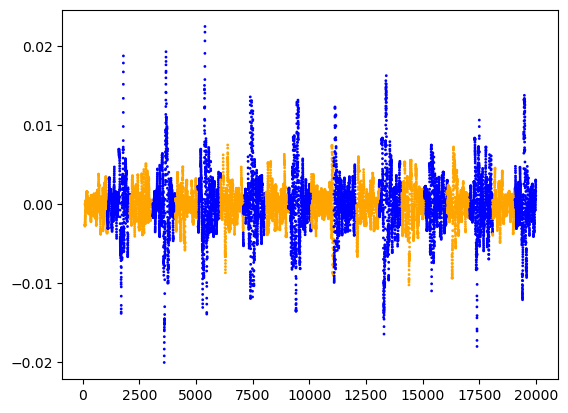

In [8]:
plt.scatter(range(len(centered["ch0"][0:20000])), centered["ch0"][:20000], color=centered["gesture"][:20000].map(colors), s=1)
plt.show()

In [12]:
maximum_filter = centered.copy()
for i in range(0,4):
    maximum_filter[f"ch{i}"] = ndimage.maximum_filter(maximum_filter[f"ch{i}"], size=9)
    
    # gera gráficos para o canal i
    plt.figure(figsize=(20,6))
    plt.scatter(range(len(maximum_filter[f"ch{i}"])), maximum_filter[f"ch{i}"], color=maximum_filter["gesture"].map(colors), s=1)
    plt.title("maximum filtered signal colored by gesture")
    plt.suptitle(f"Channel {i}")
    plt.savefig(f"../graphs/maximum_filtered/maximum-filtered-labeled-ch{i}.png")
    plt.clf()
    
maximum_filter.to_csv("../datasheets/maximum_filtered.csv")

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

### passo 3 - normalizar dados 
    - ajustar os valores das tabelas para o intervalo [-1,1]:
    - salvar em um novo arquivo csv
    - gerar gráficos

In [15]:
# copiando o datasheet
normalized = centered.copy()

for i in range (0,4):
    max_value = np.max(normalized[f"ch{i}"])
    min_value = np.min(normalized[f"ch{i}"])
    normalized[f"ch{i}"] = (2 * (normalized[f"ch{i}"] - min_value) / (max_value - min_value)) - 1
    
    # gera gráficos para o canal i
    plt.figure(figsize=(20,6))
    plt.scatter(range(len(normalized[f"ch{i}"])), normalized[f"ch{i}"], color=normalized["gesture"].map(colors), s=1)
    plt.title("normalized signal colored by gesture")
    plt.suptitle(f"Channel {i}")
    plt.savefig(f"../graphs/normalized/normalized-labeled-ch{i}.png")
    plt.clf()
    
normalized.to_csv("../datasheets/normalized.csv")

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>